In [1]:
%matplotlib notebook
from pythtb import *
import numpy as np
import pylab as pl
import matplotlib

# Define a simple 2D honeycomb lattice with lattice constant a = 1Å
lat = [[1.,0.],[-1./2.,np.sqrt(3.)/2.]] # hexagonal unit cell
orb = [[2./3.,1./3.],[1./3.,2./3.]]

# Make the two-dimensional TB model
honeycomblatt = tb_model(2,2,lat,orb)

# Set hopping terms
honeycomblatt.set_hop(1.,1,0,[0,0])
honeycomblatt.set_hop(1.,1,0,[0,1])
honeycomblatt.set_hop(1.,1,0,[-1,0])

# Make Cartesian kmesh grid for 2D band structure calculation
# Define the matrix coeffs. to transform from G-vector space to kx-ky space (Eq. 17 & 18 in .pdf documentation)
a11 = lat[0][0]
a12 = lat[0][1]
a21 = lat[1][0]
a22 = lat[1][1]

# Set half of the pixel resolution N, with final res being N = 2*pix + 1
kmesh_x = 64
kmesh_y = 64

# Set the half-width of the k-space window, in inverse Ångstrom, with final size being 2*K_max 
Kx_max = 12.0 
Ky_max = 12.0

# Divide K_max by 2*pi (see Eq. 17 & 18 in documentation)
k0_x = Kx_max/(2.*np.pi)
k0_y = Ky_max/(2.*np.pi)

# Create the kmesh that describes a rectangular kx-ky window defined by Kx_max-Ky_max centered at Kx=Ky=0
k_pts_cart = []
for i in range(-kmesh_x,kmesh_x + 1):
    for j in range(-kmesh_y,kmesh_y + 1):
        k_pts_cart.append([
            (k0_x*a11*float(i)/float(kmesh_x) + k0_y*a12*float(j)/float(kmesh_y)), # in kx, sq pixels
            (k0_x*a21*float(i)/float(kmesh_x) + k0_y*a22*float(j)/float(kmesh_y)), # in ky, sq pixels
        ])

honeycomblatt_kpts_cart = honeycomblatt.solve_all(k_pts_cart)

# Reshape the energy eigenvalues into 2D matrices
honeycomblatt_band1_cart = np.reshape(honeycomblatt_kpts_cart[0],(2*kmesh_x + 1,2*kmesh_y + 1))
honeycomblatt_band2_cart = np.reshape(honeycomblatt_kpts_cart[1],(2*kmesh_x + 1,2*kmesh_y + 1))

<IPython.core.display.Javascript object>


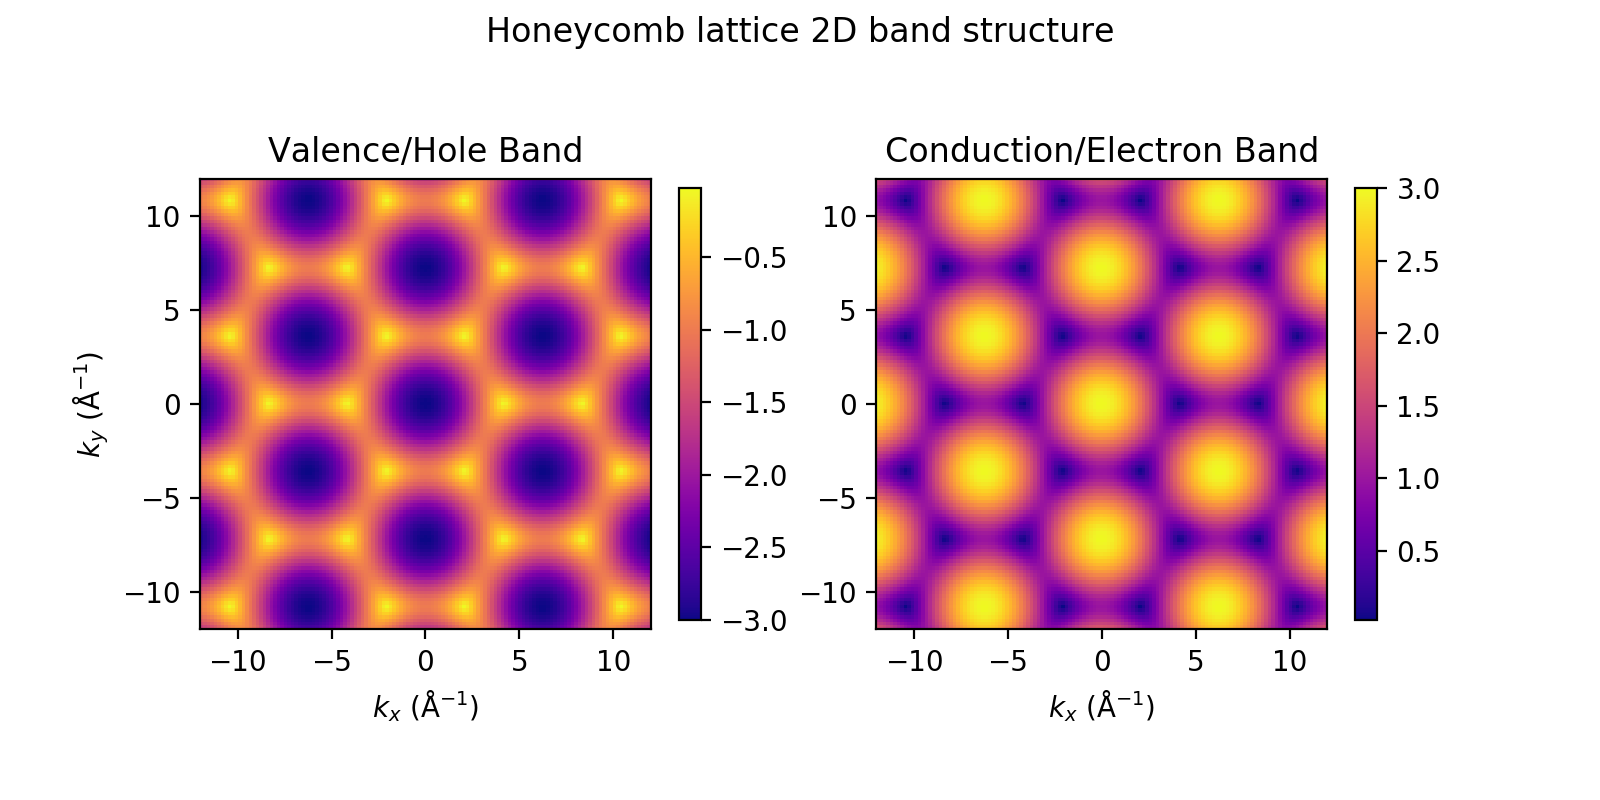

In [2]:
# Plot the 2D band structure
fig = pl.figure(figsize=(8, 4))
fig.suptitle("Honeycomb lattice 2D band structure")

ax1 = fig.add_subplot(1,2,1)
pl.imshow(np.transpose(honeycomblatt_band1_cart),extent=[-Kx_max, Kx_max, -Kx_max, Kx_max],cmap='plasma')
pl.colorbar(shrink=0.7)
ax1.set_title("Valence/Hole Band")
ax1.set_xlabel(r'$k_x$ (Å$^{-1})$')
ax1.set_ylabel(r'$k_y$ (Å$^{-1})$')

ax2 = fig.add_subplot(1,2,2)
pl.imshow(np.transpose(honeycomblatt_band2_cart),extent=[-Kx_max, Kx_max, -Kx_max, Kx_max],cmap='plasma')
pl.colorbar(shrink=0.7)
ax2.set_title("Conduction/Electron Band")
ax2.set_xlabel(r'$k_x$ (Å$^{-1})$')

pl.show()

<IPython.core.display.Javascript object>


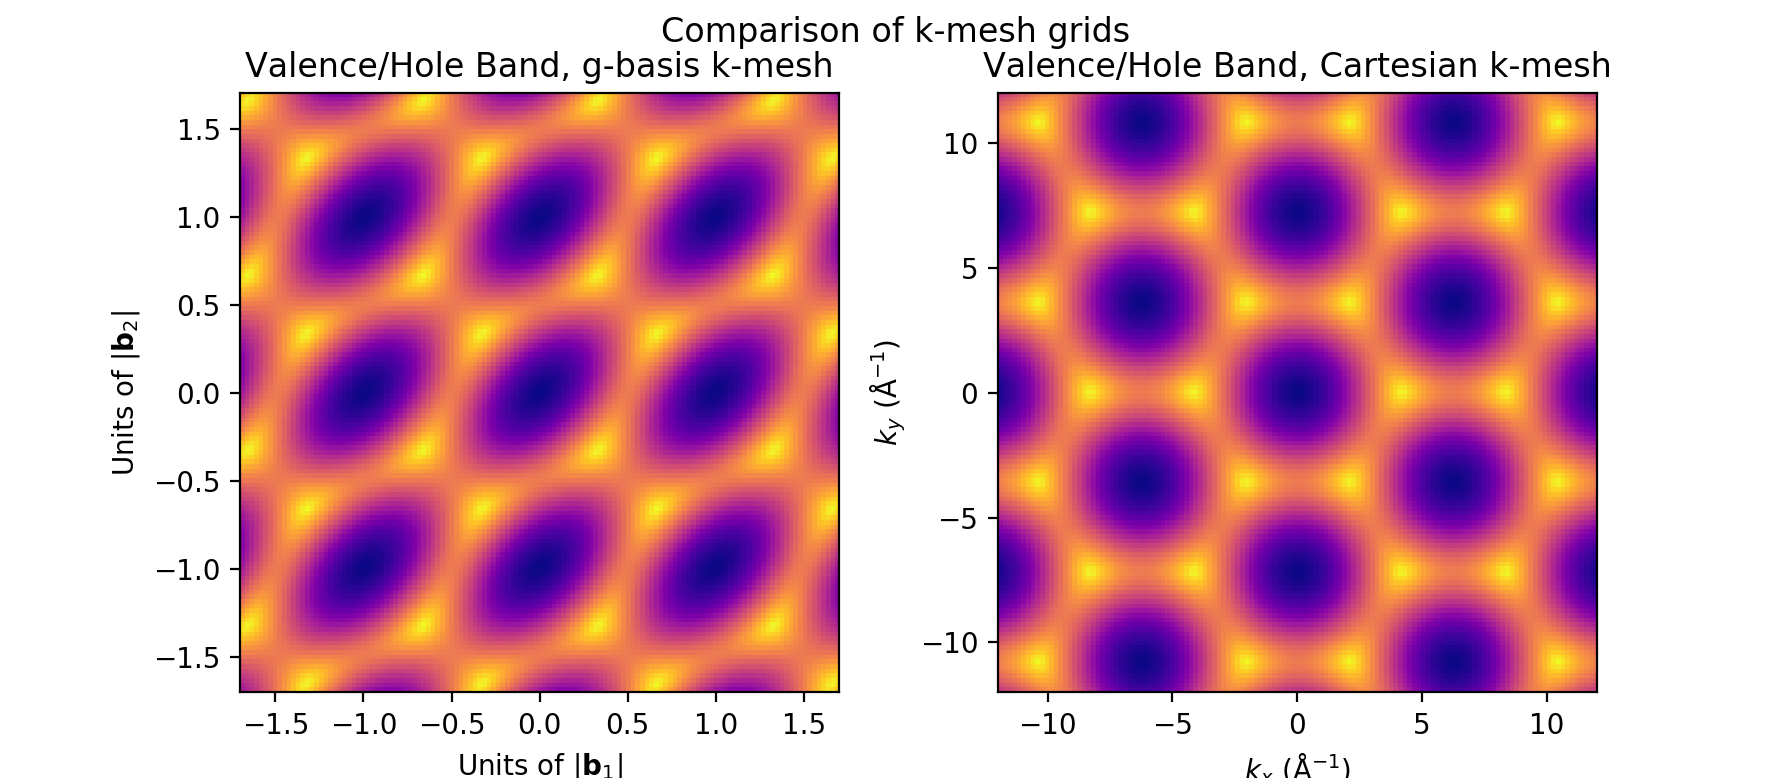

In [3]:
# Compare with a standard 2D calculation over a grid in the g-basis

G_max = 1.7

# Create the kmesh that describes a rectangular kx-ky window defined by Kx_max-Ky_max centered at Kx=Ky=0
k_pts_gbase = []
for i in range(-kmesh_x,kmesh_x + 1):
    for j in range(-kmesh_y,kmesh_y + 1):
        k_pts_gbase.append([
            G_max*float(i)/float(kmesh_x), # in g1
            G_max*float(j)/float(kmesh_y), # in g2
        ])

honeycomblatt_kpts_gbase = honeycomblatt.solve_all(k_pts_gbase)

# Reshape the energy eigenvalues into 2D matrices
honeycomblatt_band1_gbase = np.reshape(honeycomblatt_kpts_gbase[0],(2*kmesh_x + 1,2*kmesh_y + 1))
honeycomblatt_band2_gbase = np.reshape(honeycomblatt_kpts_gbase[1],(2*kmesh_x + 1,2*kmesh_y + 1))

# Plot the 2D band structure
fig = pl.figure(figsize=(8, 4))
fig.suptitle("Comparison of k-mesh grids")

ax2 = fig.add_subplot(1,2,2)
pl.imshow(np.transpose(honeycomblatt_band1_cart),extent=[-Kx_max, Kx_max, -Kx_max, Kx_max],cmap='plasma')
ax2.set_title("Valence/Hole Band, Cartesian k-mesh")
ax2.set_xlabel(r'$k_x$ (Å$^{-1})$')
ax2.set_ylabel(r'$k_y$ (Å$^{-1})$')

ax1 = fig.add_subplot(1,2,1)
pl.imshow(np.transpose(honeycomblatt_band1_gbase),extent=[-G_max, G_max, -G_max, G_max],cmap='plasma')
ax1.set_title("Valence/Hole Band, g-basis k-mesh")
ax1.set_xlabel('Units of ' r'$|\mathbf{b}_1|$')
ax1.set_ylabel('Units of ' r'$|\mathbf{b}_2|$')

pl.show()